In [3]:
pip install ta

Processing /home/jovyan/.cache/pip/wheels/bb/7c/a0/9c72e50ddef1f7c3d9003bf4ccc5d5c8deb24828d4eb156fc8/ta-0.7.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [4]:
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import ta

In [5]:
files = glob.glob('data/**/*.csv', recursive=True)

In [6]:
from ta.volatility import BollingerBands

In [7]:
df_small = pd.DataFrame(columns=['timestamp', 'daily_val'])
df_small

,timestamp,daily_val


In [8]:
# Implement bollinger band and reduce min data to daily data

df_daily = pd.DataFrame(columns=['high', 'volume', 'low', 'close', 'open', 'bb_bbm', 'bb_bbh', 'bb_bbl',
       'bb_bbhi', 'bb_bbli'])
df_daily.index = pd.to_datetime(df_daily.index)



for file in files:
    df = pd.read_csv(file)
    df=df.set_index('timestamp')
    df.index = pd.to_datetime(df.index)


    # Initialize Bollinger Bands Indicator
    indicator_bb = BollingerBands(close=df["close"], window=20, window_dev=2)

    # Add Bollinger Bands features
    df['bb_bbm'] = indicator_bb.bollinger_mavg()
    df['bb_bbh'] = indicator_bb.bollinger_hband()
    df['bb_bbl'] = indicator_bb.bollinger_lband()

    # Add Bollinger Band high indicator
    df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

    # Add Bollinger Band low indicator
    df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

    df_r = df.resample('D').mean()
    
    df_daily = df_daily.append(df_r,ignore_index=False)
    df_daily


<AxesSubplot:>

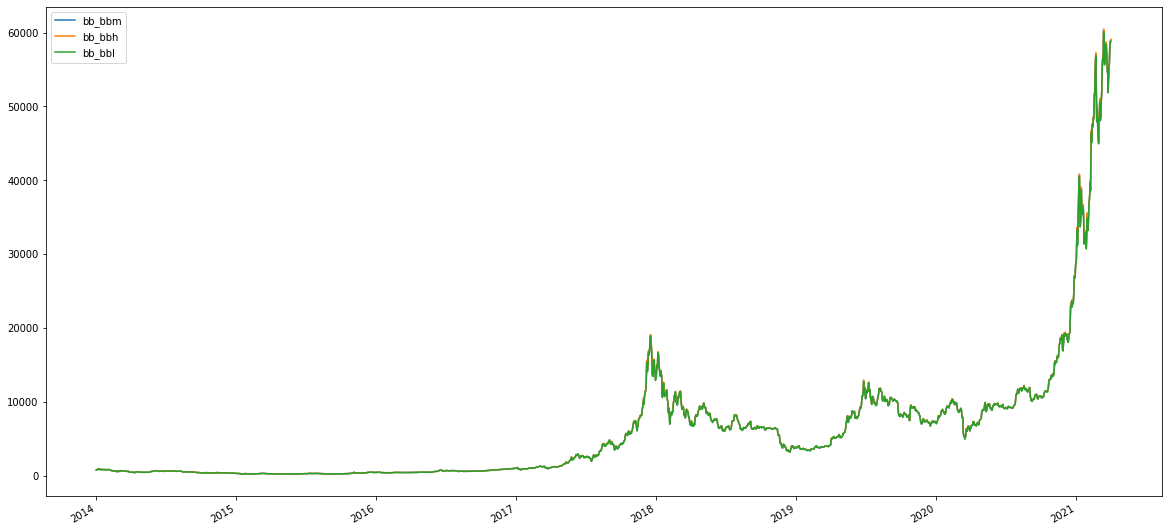

In [10]:
df_daily_bb = df_daily[['bb_bbm','bb_bbh','bb_bbl']]
df_daily_bb.plot(use_index=True, figsize=(20,10))

In [11]:
df_daily_bb.to_csv('daily BTC implemented with Bollinger Band.csv')